In [1]:
from chess_env import ChessEnv
from network import Agent
from IPython.display import clear_output, display
from helpers import device
import chess
import torch

env = ChessEnv()

gamma = 0.99
epsilon = 1.0
batch_size = 128
mem_size = 20_000
eps_end = 0.01
lr = 0.03

white = Agent(
    color = chess.WHITE,
    gamma = gamma,
    epsilon = epsilon,
    batch_size = batch_size,
    mem_size = mem_size,
    eps_end = eps_end,
    lr = lr
)

black = Agent(
    color = chess.BLACK,
    gamma = gamma,
    epsilon = epsilon,
    batch_size = batch_size,
    mem_size = mem_size,
    eps_end = eps_end,
    lr = lr
)

games = {}
number_of_games = 1_000

device

device(type='cuda')

In [2]:
def make_move(state, agent):
    current_action_space = env.action_space
    action, action_matrix = agent.choose_action(
        state,
        current_action_space
    )
    
    observation, reward, ended, _, _ = env.step(action, agent)

    reward = torch.tensor([reward], device=device)

    if ended:
        next_state = None
    else:
        next_state = torch.tensor(
            observation,
            dtype=torch.float32,
            device=device
        )

    agent.store_transition(
        torch.tensor(state),
        torch.tensor(action_matrix, dtype=torch.int64),
        next_state,
        reward
    )
    agent.learn()

    return next_state, ended

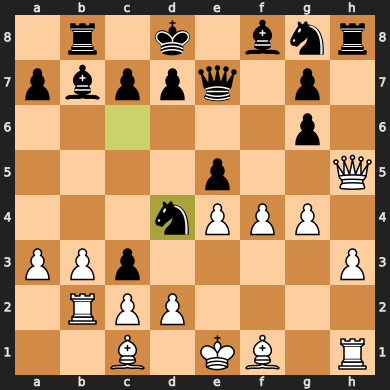

Game: 1000. Move Count: 50.


In [3]:
for game in range(number_of_games):
    ended = False
    state, info = env.reset()
    while not ended:
        current_action_space = env.action_space

        for player in [white, black]:
            if ended:
                break

            state, ended = make_move(state, player)
            
            if ended:
                break

            if player.color == chess.WHITE:
                state *= -1
                
            clear_output(wait=True)
            display(env.game)
            print(f"Game: {game + 1}. Move Count: {len(env.game.move_stack)}.")

    games[game] = {
        "pgn" : env.pgn(),
        "board" : env.game,
    }

In [5]:
gamepgns = [game["pgn"] for game in games.values()]
print(len(gamepgns))
for pgn in gamepgns:
    print(pgn)

1000
1. Nf3 c6 2. Rg1 Qb6 3. Ne5 Kd8 4. Rh1 Nh6 5. g3 d5 6. Nf3 Qb4 7. h3 b5 8. Nc3 Qf4 9. Rb1 d4 10. Bg2 Ba6 11. a3 Qe3 12. Nxb5 f6 13. Nd6 Nf5 14. Nc8 Bb5 15. Rg1 Ba6 16. Ra1 Qd3 17. Ng5 Rg8 18. Bf1 Bxc8 19. a4 Ne3 20. c4 Bb7 21. b3 Kd7 22. f4 Qb1 23. Nf7 Bc8 24. Nd8 h6 25. Rg2 Nxc4 26. h4 *
1. a3 f6 2. g4 e6 3. e4 Nc6 4. f4 e5 5. Ke2 Nb4 6. d4 Nc6 7. a4 b5 8. Ke3 Bc5 9. h3 Be7 10. axb5 Kf8 11. Kf3 Ba3 12. Bd3 Qe8 13. Kf2 Bxb2 14. h4 Nxd4 15. Nh3 Qh5 16. Qe2 exf4 17. Nxf4 d6 18. Ke3 Nf5+ 19. gxf5 Qg5 20. e5 Qg2 21. Qxg2 h5 22. Ra4 Rh6 23. b6 Kf7 24. Qxg7+ Ke8 25. Ra3 Bc3 26. Qg4 *
1. b3 f6 2. h3 b5 3. Nf3 c6 4. Rh2 Bb7 5. Nd4 c5 6. Ne6 b4 7. Nd4 d5 8. e4 Nd7 9. Nf3 a6 10. Nh4 Rc8 11. Nf3 Qc7 12. Bxa6 e6 13. g4 e5 14. d4 Kd8 15. Bb5 h6 16. Kf1 Be7 17. Kg1 h5 18. Bh6 Rh7 19. Nfd2 Nf8 20. c4 Qc6 21. dxc5 Ke8 22. Bxg7 Ba6 23. Qc1 Rb8 24. Qe1 dxe4 25. Qf1 Qd7 26. Bh8 *
1. h3 b5 2. f4 Na6 3. Kf2 Nb4 4. g4 a6 5. Ke3 f5 6. d4 Nd3 7. Nf3 b4 8. Ne1 Ne5 9. dxe5 Ra7 10. Kf2 g5 11. Nd2 a5 12. c4 